# K-means Clustering

K-means clustering is a widely used unsupervised machine learning algorithm for partitioning a given dataset into a set of k groups (i.e., k clusters), where k represents the number of groups pre-specified by the analyst. It classifies objects in multiple groups based on their feature similarities, ensuring that the data points in each cluster are as similar as possible while keeping the clusters as different as possible.

The algorithm works as follows:

- **Initialization**: It starts by randomly selecting k initial centroids, where each centroid is the center of a cluster.
- **Assignment**: Each data point is assigned to its nearest centroid, based on the squared Euclidean distance. Every point is allocated to the cluster whose distance from the cluster's centroid is minimum.
- **Update**: Once all data points are assigned to clusters, the centroids are recomputed as the mean of all data points belonging to each cluster.
- **Iteration**: Steps 2 and 3 are repeated until the positions of the centroids stabilize, meaning that the centroids of newly formed clusters do not significantly change between iterations.
- **Convergence**: The algorithm stops either when centroids have stabilized, a predetermined number of iterations is reached, or a defined tolerance level is achieved.

Main Uses of K-means Clustering:

- **Market Segmentation**: Understanding and categorizing customers based on their purchasing behavior or characteristics.
- **Document Clustering**: Organizing web pages into hierarchical groups based on their content similarity.
- **Image Segmentation**: Classifying pixels in an image into different clusters based on their color, intensity, or texture.
- **Pattern Recognition**: Often used in computer vision and speech recognition for pattern discovery and recognition.
- **Data Compression**: In applications like image compression, K-means can help reduce the number of colors used in an image.

The success of k-means relies heavily on the initial selection of centroids and the value of k. Methods like the Elbow Method, Silhouette Score, and Gap Statistic are often used to determine an optimal value of k. Despite its popularity, K-means has some limitations, such as its sensitivity to the initial centroids and its struggle with non-globular clusters or clusters of different sizes and densities.

In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

## Generate Data

In [270]:
# generates blobs for clustering
from sklearn.datasets import make_blobs

# generates a numpy array of tuples:
"""
- Number of Samples (n_samples=200): It generates 200 data points.
- Number of Features (n_features=2): Each data point has 2 features (or dimensions),
    making it suitable for a 2D plot.
- Number of Centers (centers=4): The data points are grouped around 4 centers or clusters.
- Cluster Standard Deviation (cluster_std=1.8): Each cluster has a spread or dispersion,
    with a standard deviation of 1.8. This controls how much the points in each cluster
    are spread out.
"""
data = make_blobs(
    n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101
)

# 200 samples (rows) with 2 features (columns)
data[0].shape

(200, 2)

In [271]:
data

(array([[-6.42884095e+00,  1.01411174e+01],
        [ 5.86867888e+00,  5.20110356e+00],
        [-3.76109375e-01,  3.26427943e+00],
        [ 2.16679181e+00,  9.56300522e+00],
        [ 5.09508570e+00,  7.20752718e+00],
        [-1.08788882e+01, -6.11318040e+00],
        [ 2.03405554e+00,  9.76664755e+00],
        [-1.71798771e+00,  1.41401140e+00],
        [ 1.16911341e+00,  8.24556988e+00],
        [-1.35185444e+00,  3.13245345e+00],
        [-6.18548214e+00,  9.67406555e+00],
        [-1.19856602e+00,  2.50408937e+00],
        [ 2.90296863e+00,  7.91251003e+00],
        [ 2.39250023e+00,  5.38173971e+00],
        [-5.27545147e+00,  9.63836659e+00],
        [-5.66814687e-01,  5.60262755e-02],
        [ 5.97336628e+00,  5.87172022e+00],
        [-2.31355268e+00,  5.23980092e-01],
        [-1.01344756e+01, -3.43130837e+00],
        [-4.54082629e+00,  1.13920174e+01],
        [-1.04155833e+01, -5.67545836e+00],
        [ 6.64796693e-01,  9.42304718e-02],
        [ 2.11460477e+00,  3.559

In [272]:
"""
This is an array of shape (n_samples, n_features) containing
the generated samples. In this case, with n_samples=200 and n_features=2,
it's an array of 200 pairs of coordinates, each pair representing a point 
in a 2D space.
"""
data[0]


array([[-6.42884095e+00,  1.01411174e+01],
       [ 5.86867888e+00,  5.20110356e+00],
       [-3.76109375e-01,  3.26427943e+00],
       [ 2.16679181e+00,  9.56300522e+00],
       [ 5.09508570e+00,  7.20752718e+00],
       [-1.08788882e+01, -6.11318040e+00],
       [ 2.03405554e+00,  9.76664755e+00],
       [-1.71798771e+00,  1.41401140e+00],
       [ 1.16911341e+00,  8.24556988e+00],
       [-1.35185444e+00,  3.13245345e+00],
       [-6.18548214e+00,  9.67406555e+00],
       [-1.19856602e+00,  2.50408937e+00],
       [ 2.90296863e+00,  7.91251003e+00],
       [ 2.39250023e+00,  5.38173971e+00],
       [-5.27545147e+00,  9.63836659e+00],
       [-5.66814687e-01,  5.60262755e-02],
       [ 5.97336628e+00,  5.87172022e+00],
       [-2.31355268e+00,  5.23980092e-01],
       [-1.01344756e+01, -3.43130837e+00],
       [-4.54082629e+00,  1.13920174e+01],
       [-1.04155833e+01, -5.67545836e+00],
       [ 6.64796693e-01,  9.42304718e-02],
       [ 2.11460477e+00,  3.55938488e+00],
       [-1.

In [273]:
"""
This is an array of shape (n_samples,) containing the integer labels
for cluster membership of each sample. Since centers=4, these labels are integers
from 0 to 3, indicating which of the 4 clusters each point belongs to.
"""
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0,
       0, 1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3,
       0, 3, 3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0,
       1, 2, 2, 1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3,
       2, 1, 1, 1, 1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1,
       0, 3, 3, 2, 1, 2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3,
       0, 1, 1, 3, 2, 3, 2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2,
       0, 3, 2, 2, 2, 0, 2, 0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3,
       2, 2, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2,
       1, 0])

## Exploratory Data Analysis

'\n- data[0][:,0]: This selects all rows (samples) from data[0] and\n    takes the first value (the x-coordinate) from each pair of coordinates.\n- data[0][:,1]: Similarly, this selects the second value (the y-coordinate)\n    from each pair of coordinates in data[0].\n'

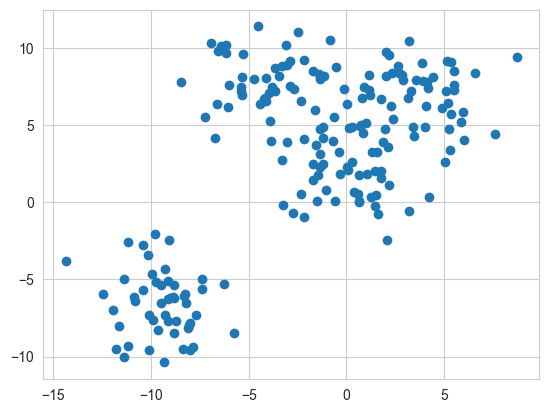

In [274]:
# plot all rows in 1st column x all rows in 2nd column
plt.scatter(data[0][:, 0], data[0][:, 1])
"""
- data[0][:,0]: This selects all rows (samples) from data[0] and
    takes the first value (the x-coordinate) from each pair of coordinates.
- data[0][:,1]: Similarly, this selects the second value (the y-coordinate)
    from each pair of coordinates in data[0].
"""

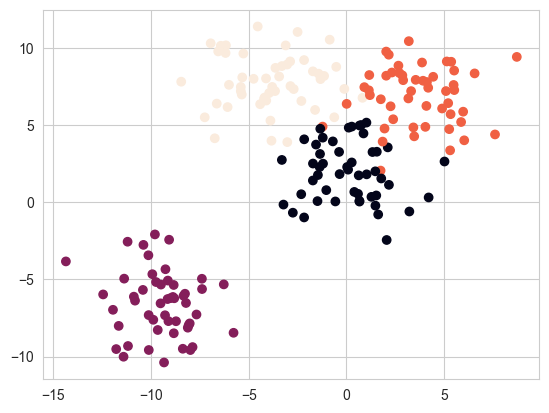

In [275]:
plt.scatter(data[0][:, 0], data[0][:, 1], c=data[1])

## K-Means

In [276]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(data[0])
kmeans.get_params()  # fit the model with features

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

- **algorithm**='lloyd': (K-means algorithm to use): 'lloyd' is the standard k-means algorithm. Alternative 'elkan' uses triangle inequality, but is more memory intensive.
- **copy_x**=True: (Whether to copy the input data): True ensures the original data remains unchanged. False may lead to data being modified for efficiency.
- **init**='k-means++': (Initialization method): 'k-means++' carefully chooses initial centroids to improve convergence. Other methods include random centroids.
- **max_iter**=300: (Maximum number of iterations for each run): Determines the maximum iterations for k-means to converge.
- **n_clusters**=4: (Number of clusters to form): Specifies the number of centroids or clusters in the dataset.
- **n_init**=10: (Number of time the k-means algorithm will run): Multiple runs with different centroid seeds improve the chances of a better outcome.
- **random_state**=None: (Seed for random number generator): Ensuring reproducibility of results when set to an integer.
- **tol**=0.0001: (Tolerance for declaring convergence): A smaller value demands more precise convergence.
- **verbose**=0: (Verbosity level): Controls the amount of logging information shown. Higher values offer more details.

In [277]:
kmeans.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

`kmeans.cluster_centers_` represents the coordinates of the cluster centers in our K-means clustering model. In the context of the output, it indicates that we have 4 clusters. Here's a breakdown of what this array means:

1) Number of Clusters: The number of rows in the array corresponds to the number of clusters. In this case, there are 4 rows, so we have 4 clusters.

2) Coordinates of Each Cluster Center: Each row in the array represents the coordinates of the center (or centroid) of a cluster. Since our data has 2 features (as indicated by the 2 values in each row), each coordinate is in 2-dimensional space.

3) Interpreting the Values:
- The first row [-0.0123077 , 2.13407664] represents the center of the first cluster. The first value (-0.0123077) is the centroid's coordinate on the first feature axis, and the second value (2.13407664) is the coordinate on the second feature axis.
- Similarly, the second row [-9.46941837, -6.56081545] represents the center of the second cluster, with its coordinates in the 2-dimensional feature space, and so on.

In [278]:
# predicted labels (which is different than the actual data[1] labels)
kmeans.labels_

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       1, 0], dtype=int32)

In [279]:
def show_kmeans(n_clusters: int):
    """
    two scatter plots to compare the clustering results of a
    KMeans algorithm with the original data distribution
    """

    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(data[0])

    # `plt.subplots(1, 2)` creates a figure with one row and two columns,
    #   which means it will have two subplots side by side.
    # sharey=True means both plots share the same y-axis scale.
    _, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

    ax1.set_title("K Means")
    ax1.scatter(data[0][:, 0], data[0][:, 1], c=kmeans.labels_, cmap="rainbow")

    ax2.set_title("Original")
    ax2.scatter(data[0][:, 0], data[0][:, 1], c=data[1], cmap="rainbow")

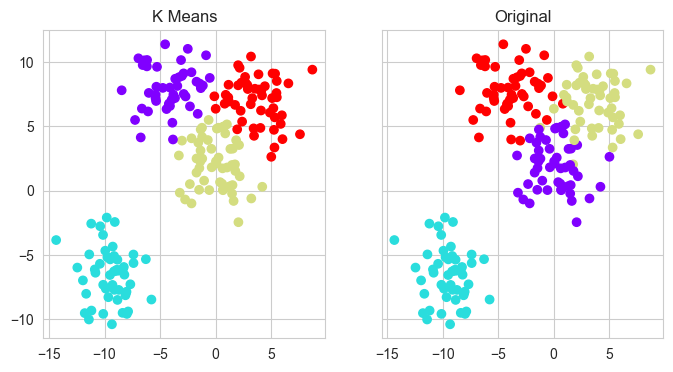

In [280]:
# we already know from the original dataset that there're 4 clusters ;)
show_kmeans(n_clusters=4)

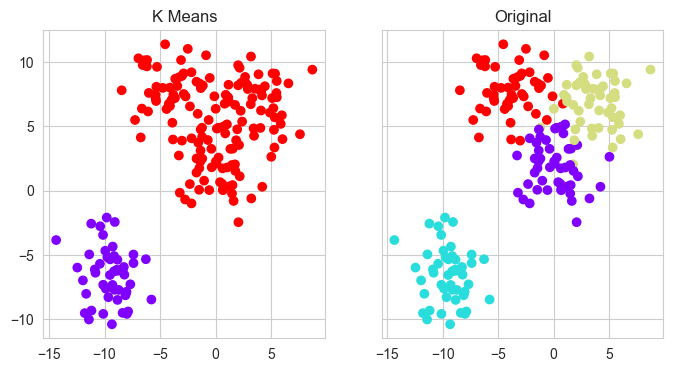

In [281]:
# k-means with 2 clusters
show_kmeans(n_clusters=2)

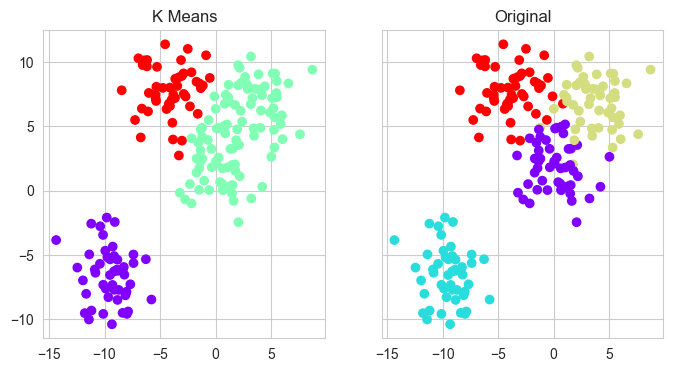

In [282]:
# k-means with 3 clusters
show_kmeans(n_clusters=3)

## Cluster Validation Techniques
-> Determine the optimal # of clusters

### 1) Elbow Method: 
- For a range of cluster numbers (e.g., 1 to 10), compute the KMeans clustering.
- For each number, calculate the total within-cluster sum of square (WSS).
- Plot the number of clusters against the WSS.
- Look for the 'elbow' point where the WSS begins to decrease more slowly, which is point where the rate of decrease in distortion (or inertia) shifts from steep to more gentle, indicating that adding more clusters beyond this point does not provide much better modeling of the data.

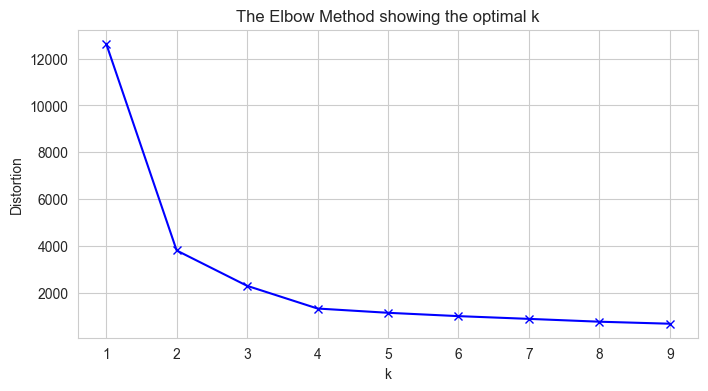

In [283]:
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=10).fit(data[0])
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

### 2) Silhouette Score:
- Similar to the Elbow Method, perform KMeans clustering for a range of cluster numbers.
- Calculate the silhouette score for each number of clusters. This score measures how similar an individual point is to points in its own cluster compared to points in other clusters.
- A high silhouette score suggests that the point is well matched to its own cluster and poorly matched to neighboring clusters.
The optimal number of clusters corresponds to the highest average silhouette score.

K=2 -> Silhouette Score=0.649
K=4 -> Silhouette Score=0.552
K=3 -> Silhouette Score=0.504
K=5 -> Silhouette Score=0.479
K=6 -> Silhouette Score=0.390
K=7 -> Silhouette Score=0.368
K=8 -> Silhouette Score=0.363
K=9 -> Silhouette Score=0.360


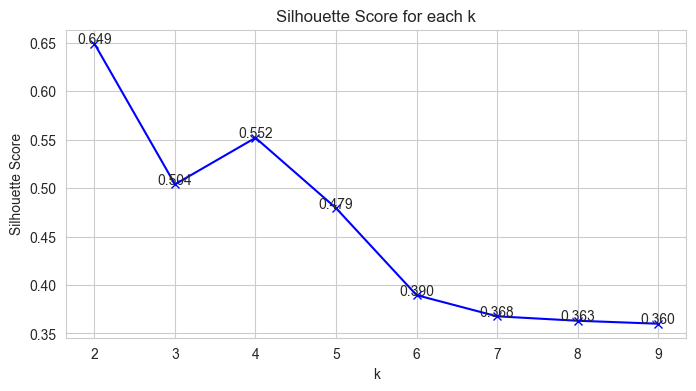

In [284]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 10)

def score_calculation():
    for k in K:
        kmeanModel = KMeans(n_clusters=k, n_init=10).fit(data[0])
        score = silhouette_score(data[0], kmeanModel.labels_)
        silhouette_scores.append(score)

def show_sorted_scores():
    # Combining scores with their corresponding 'k' values
    score_k_pairs = zip(silhouette_scores, K)
    # Sorting the pairs in descending order based on score
    sorted_pairs = sorted(score_k_pairs, reverse=True)
    sorted_output = [f"K={k} -> Silhouette Score={score:.3f}" for score, k in sorted_pairs]
    for item in sorted_output:
        print(item)

def plot_scores():
    plt.figure(figsize=(8, 4))
    plt.plot(K, silhouette_scores, "bx-")
    for i, txt in enumerate(silhouette_scores):
        plt.text(K[i], silhouette_scores[i], f"{txt:.3f}", ha="center")
    plt.xlabel("k")
    plt.ylabel("Silhouette Score")
    plt.title("Silhouette Score for each k")
    plt.show()

score_calculation()
show_sorted_scores()
plot_scores()

    - A silhouette score of 0.65 for k=2 indicates that two clusters provide a relatively better-defined
    and separated grouping of your data compared to other values of k. However, it's worth noting that the
    original dataset was generated with 4 centers. The score for k=4 (0.55) is also quite high, suggesting
    that four clusters also represent a meaningful grouping.

    - The choice between k=2 and k=4 can depend on the specific context and requirements of your analysis.
    If the goal is to align with the original data generation, k=4 is appropriate. However, for the most
    distinct clustering as per the silhouette score, k=2 is the better choice.

### 3) Gap Statistic:
*(The Gap Statistic is more advanced and might be overkill for simple applications)*
- Calculate the log of within-cluster dispersion for different values of k (number of clusters).
- Generate a null reference distribution of the data, for example, a uniform random distribution.
- Calculate the log of within-cluster dispersion for the null reference data for different values of k.
- The optimal number of clusters is where the gap between the curve of the original data and the curve of the reference data is the largest.

In [285]:
from sklearn.utils import resample


def gap_statistic(X, max_clusters=10, n_refs=20):
    gaps = np.zeros((max_clusters,))
    resultsdf = pd.DataFrame(columns=["clusterCount", "gap"])

    for gap_index, k in enumerate(range(1, max_clusters + 1)):
        kmeans = KMeans(n_clusters=k, n_init=10)
        kmeans.fit(X)
        refDisps = np.zeros(n_refs)
        for i in range(n_refs):
            randomReference = resample(X)
            kmeans.fit(randomReference)
            refDisps[i] = kmeans.inertia_

        origDisp = kmeans.fit(X).inertia_
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap

        resultsdf.loc[gap_index] = [k, gap]

    return (gaps.argmax() + 1, resultsdf)


# Example usage
data = make_blobs(
    n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101
)[0]
optimal_clusters, gap_data = gap_statistic(data)

print(f"Optimal number of clusters: {optimal_clusters}")
print(gap_data)

Optimal number of clusters: 4
   clusterCount       gap
0           1.0 -0.015603
1           2.0 -0.012639
2           3.0  0.002705
3           4.0  0.002734
4           5.0 -0.053345
5           6.0 -0.089132
6           7.0 -0.091248
7           8.0 -0.058882
8           9.0 -0.116454
9          10.0 -0.097478
